Importing the required libs


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def load_data(file):
    temp=pd.read_csv(file)
   
    return temp
    

In [8]:
file_name="Zomato Data .csv"
df=load_data(file_name)

Performing some EDA operations

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [10]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [13]:
for col in df.columns:
    print(col)

name
online_order
book_table
rate
votes
approx_cost(for two people)
listed_in(type)


In [16]:
df.rename(columns={"rate":"ratings"},inplace =True)

In [17]:
df.head()

,name,online_order,book_table,ratings,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Converting ratings column datatype to float and removing denominator

In [19]:
def handle_ratings(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)

df["ratings"]=df["ratings"].apply(handle_ratings)
df.head()

,name,online_order,book_table,ratings,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   ratings                      148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Checking the missing values

In [21]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
ratings                        0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [22]:
#There are no missing values in the Data set

Visualizing the restuarent types

Text(0.5, 0, 'Types of Restaurent')

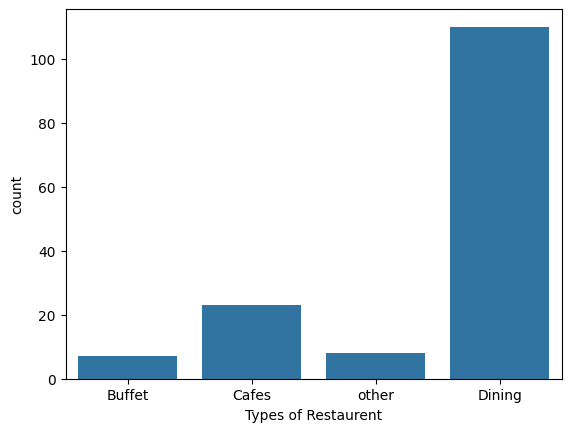

In [25]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Types of Restaurent")

Conclusion: Most of restaurent fall under Dinig category

Let's Analyze the votes

Text(0, 0.5, 'Votes')

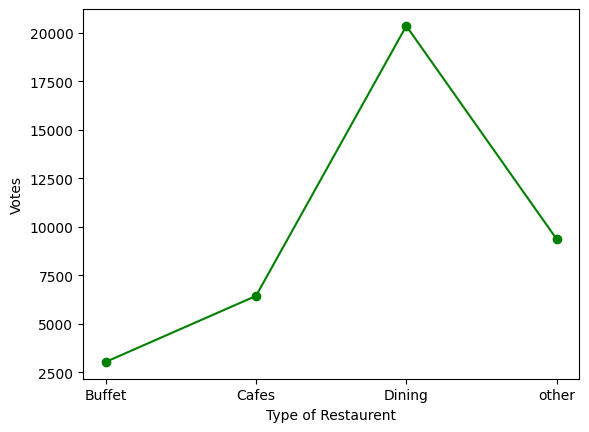

In [29]:
grouped_data=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurent")
plt.ylabel("Votes")

Dining category has over 20000 votes

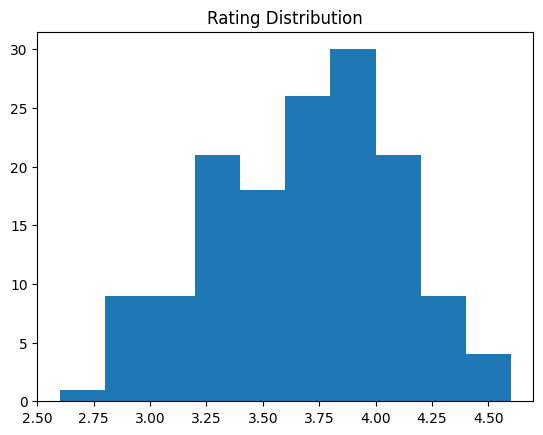

In [34]:
plt.hist(df["ratings"],bins=10)
plt.title("Rating Distribution")
plt.show()

Most of the rating given by people is between 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

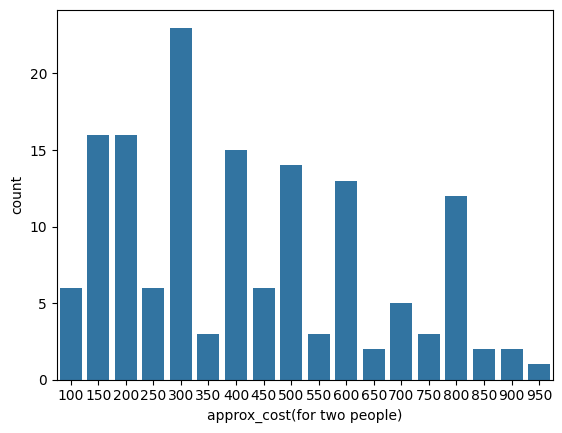

In [33]:
couple_data=df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

Average amount spent by a couple is 300 

<Axes: xlabel='online_order', ylabel='ratings'>

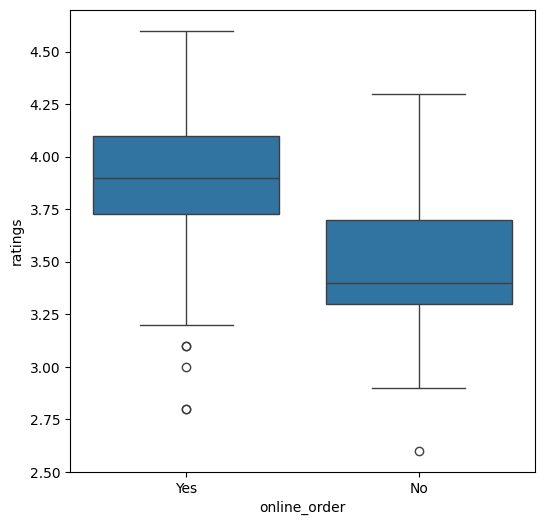

In [38]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="ratings",data=df)

Online orders obtain excellent rating than offline orders